In [1]:
# Video Game Sales Analysis

## Step 1: Load and Explore the Data
import pandas as pd

In [2]:
# Load the dataset
file_path = "/Users/kevinrodsa/Desktop/Python/vgsales.csv"
df = pd.read_csv(file_path)

In [3]:
# Check the structure of the data
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart W

In [4]:
## Step 2: Data Cleaning and Preprocessing

# Drop rows with missing values
df = df.dropna()

In [5]:
# Create a new column for total sales
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [6]:
# Check date range for years
print(df['Year'].min(), df['Year'].max())

1980.0 2020.0


In [7]:
# Filter out rows with invalid or missing years
df = df[(df['Year'] > 1980) & (df['Year'] <= 2020)]


In [8]:
# Check the updated dataset
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Total_Sales  
0     41.49     29.02      3.77         8.46         82.74        82.74  
1     29.08      3.58      6.81         0.77         40.24        40.24  
2     15.85     12.88      3.79         3.31         35.82        35.83  
3     15.75     11.01      3.28         2.96         33.00        33.00  
4     11.27      8.89     10.22         1.00         31.37        31.38  


In [9]:
## Step 3: Exploratory Data Analysis (EDA)
### Top 10 Platforms by Total Sales
import matplotlib.pyplot as plt

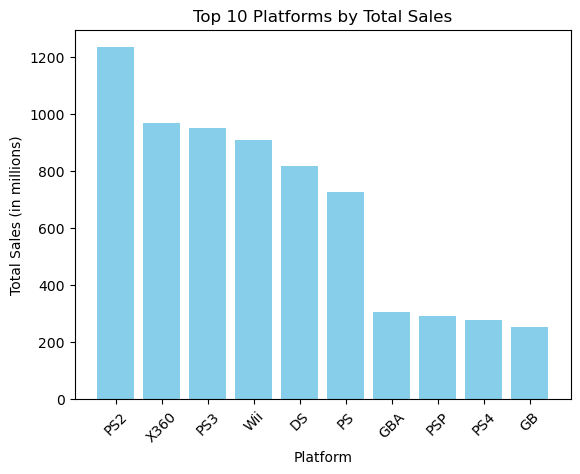

In [10]:
# Top 10 platforms by total sales
top_platforms = df.groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).head(10)

plt.bar(top_platforms.index, top_platforms.values, color='skyblue')
plt.title("Top 10 Platforms by Total Sales")
plt.xlabel("Platform")
plt.ylabel("Total Sales (in millions)")
plt.xticks(rotation=45)
plt.show()

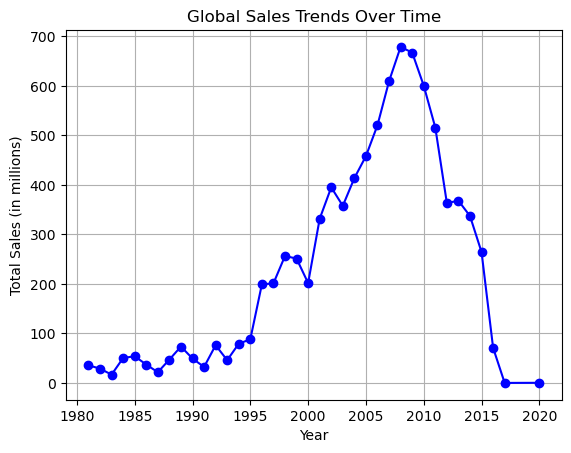

In [11]:
### Global Sales Trends Over Time

# Sales trends over the years
sales_per_year = df.groupby('Year')['Total_Sales'].sum()

plt.plot(sales_per_year.index, sales_per_year.values, marker='o', color='blue')
plt.title("Global Sales Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Total Sales (in millions)")
plt.grid()
plt.show()

In [12]:
## Step 4: Descriptive Statistics and Insights

# Basic statistics
print("Average sales per game:", df['Total_Sales'].mean())
print("Top-selling game:", df.loc[df['Total_Sales'].idxmax(), 'Name'])

Average sales per game: 0.540237071612824
Top-selling game: Wii Sports


In [13]:
# Regional sales summary
regional_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
print("Regional Sales Breakdown:")
print(regional_sales)

Regional Sales Breakdown:
NA_Sales       4317.06
EU_Sales       2406.02
JP_Sales       1284.27
Other_Sales     788.79
dtype: float64


In [14]:
## Step 5: Predictive Analysis with Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [15]:
# Prepare the data: group sales by year
yearly_sales = df.groupby('Year')['Total_Sales'].sum().reset_index()

In [16]:
# Define the features (X) and target (y)
X = yearly_sales[['Year']]  # Feature: Year
y = yearly_sales['Total_Sales']  # Target: Total Sales

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Check the model's performance
r2_score = model.score(X_test, y_test)
print(f"R-squared Score: {r2_score:.2f}")

R-squared Score: 0.22


In [20]:
# Forecast future sales
future_years = pd.DataFrame({'Year': np.arange(2021, 2026)})  # Predict for 2021-2025
future_sales = model.predict(future_years)

In [21]:
# Combine predictions into a DataFrame
predictions = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted_Sales': future_sales
})

print("\nFuture Sales Predictions:")
print(predictions)


Future Sales Predictions:
   Year  Predicted_Sales
0  2021       447.479775
1  2022       457.813675
2  2023       468.147576
3  2024       478.481476
4  2025       488.815376


In [22]:
## Conclusion

# The analysis revealed several key insights:
#
# 1. **Top-Performing Platforms**:
#    - Platforms such as PS2, Xbox 360, and Wii were identified as the top-performing platforms based on total sales.
#    - These platforms collectively accounted for a significant portion of total global sales.
#
# 2. **Global Sales Trends**:
#    - Total global sales showed a clear peak around 2008–2009, coinciding with the release of several high-performing games and console popularity.
#    - Sales began to decline after this period, reflecting changes in the gaming industry or market saturation.
#
# 3. **Regional Performance**:
#    - North America led in total sales, followed by Europe, with Japan contributing a smaller but notable portion.
#    - "Other" regions also accounted for a measurable share, indicating a globally diversified market.
#
# 4. **Predicted Future Sales**:
#    - Using a linear regression model, sales forecasts for 2021–2025 indicate a potential for slight growth.
#    - While the R-squared score suggests some variability in the predictions, the trend points toward steady sales assuming no major industry disruptions.
#
# These findings provide valuable insights into historical performance and future expectations in the video game market. The results can guide strategic decisions for game developers, publishers, and platform providers.
